In [1]:
# Here we will be using the example from Nielsen of whether to attend the cheese festive or not.
# Our choice is based on 3 inputs: weather, friend, public transport
# For example input [0,1,0] means bad weather, friend available, no public transport
# A Perceptron can make this decision for us

# First we will play around with vector dot product and matrix transpose etc

# initial weights for a decision perceptron and sample inputs

import numpy as np
# sample weights vector w  and two input vectors i1 and i2
w = np.array([6,2,2])
i1 = np.array([1,0,0])
i2 = np.array([0,1,1])

# dot product of 2 vectors
w.dot(i1)

6

In [2]:
w.dot(i2)

4

In [3]:
# Put i1 and i2 into into a matrix, ecah vector will be a row.
ins = np.array([i1, i2])
print(ins)

[[1 0 0]
 [0 1 1]]


### Why does the following code give errors?
```python
w.dot(ins)
```

The code above gives an error, as we cannot multiply a vector by a matrix. We can however multiply a matrix by a vector, which is why a transpose works. 

In [4]:
# A matrix transpose will convert rows into columnms and vice versa
print(ins.T)
w.dot(ins.T)

[[1 0]
 [0 1]
 [0 1]]


array([6, 4])

In [5]:
# Alternatively instead of using the transpose of ins, we could rearrange the dot product
ins.dot(w)

array([6, 4])

In [6]:
# Now we provide the full code for single decision perceptron for attending cheese festival or not
# 3 variable input: weather good, friend coming too, public transport
# Note that we are not training the Perceptron here. That's for the next lab

import numpy as np

def cheese_decide(input):
    weights = np.array([6,2,2])
    threshold = 5
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0


In [7]:
# Perceptron favours good weather above all in deciding
cheese_decide(i1)

1

In [8]:
# with poor weather, even with a friend coimg and public transport available not enough to go
cheese_decide(i2)

0

In [9]:
# if you change threshold to 3 instead of 5, then with poor weather, friend coming and 
# public transport are enough to decide to go

def cheese_decide(input):
    weights = np.array([6,2,2])
    threshold = 3
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0

cheese_decide( i2)

1

In [10]:
# redfine cheese_decide perceptron to use bias instead of threshold, i.e. instead of 
# weights.dot(input) - threshold > 0  use
# weights.dot(input) + bias >  0

def cheese_decide1(input):
    weights = np.array([6,2,2])
    bias = -3
    if weights.dot(input) + bias > 0:
        return 1
    else:
        return 0


In [11]:
cheese_decide1([1,0,0]), cheese_decide1([0,1,1]), cheese_decide1([0,0,1])

(1, 1, 0)

# Exercises

### Exercise 1 

Write a function nand(x) for a 2 input perceptron that implements logical NAND with weights -2 and -2 and bias 3. 

In [12]:
inputs = np.array([[0,0],[0,1], [1,0], [1,1]])
print(inputs)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [13]:
# complete the code and run it

def nand(x):  
    weights = np.array([-2, -2])
    bias = 3
    if weights.dot(x) + bias > 0:
        return 1
    else: 
        return 0


print(nand(inputs[0]), nand(inputs[1]), nand(inputs[2]), nand(inputs[3]))

1 1 1 0


### Exercise 2

Rewrite the function nand(xs) for the 2 input perceptron that implements logical NAND with weights -2 and -2 and bias 3 except that this time all the 4 input vectos are supplied together as a 4 by 2 array. Should return 4 corresponding ouputs as a vector. This will necessitate a loop to iteration thru all the input vectors.

In [22]:
# Modify nand() so that is can process all the input vectos togethjer
# complete the code and run it


def nand(xs):
    weights = np.array([-2, -2])
    bias = 3
    return_array = np.zeros(xs.shape[0])
    for i in range(xs.shape[0]):
        if weights.dot(xs[i]) + bias > 0:
            return_array[i] = 1
        else:
            return_array[i] = 0

    return return_array

nand(inputs)

array([1., 1., 1., 0.])

### Exercise 3: sigmoid function exercises


In [25]:
# write code for this activation function and test it
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

test_values = [-10, -5, -1, 0, 1, 5, 10, 100]

for value in test_values:
    result = sigmoid(value)
    print(f"Sigmoid({value}) = {result}")

Sigmoid(-10) = 4.5397868702434395e-05
Sigmoid(-5) = 0.0066928509242848554
Sigmoid(-1) = 0.2689414213699951
Sigmoid(0) = 0.5
Sigmoid(1) = 0.7310585786300049
Sigmoid(5) = 0.9933071490757153
Sigmoid(10) = 0.9999546021312976
Sigmoid(100) = 1.0


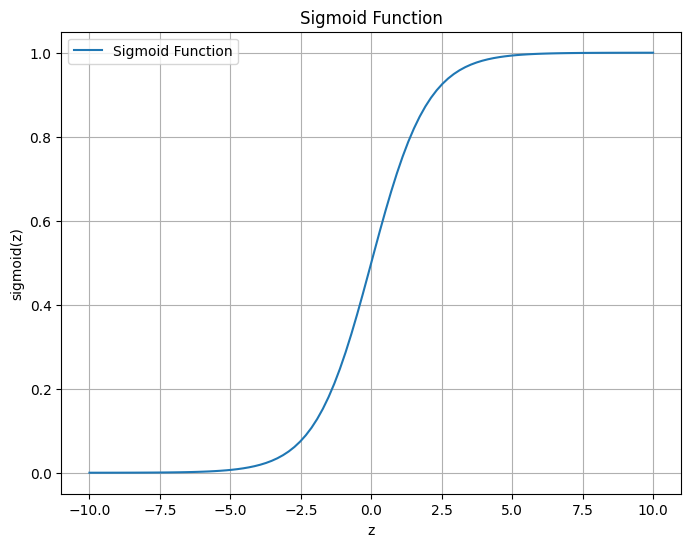

In [34]:
# use Matplotlib to plot a graph of sigmoid
# Look up an online tutorial for a simple example
import matplotlib as mplot
import matplotlib.pyplot as plt

# Test the sigmoid function
# Generate an array of 100 values between -10 and 10
z_values = np.linspace(-10, 10, 100)

# Calculate the sigmoid for each value
sigmoid_values = sigmoid(z_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.legend()
plt.grid(True)
plt.show()